In [2]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [3]:
df_Dodgers = pd.read_csv('dodgers.csv')

In [4]:
df_Dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [5]:
# Takes binary categories and returns 0 or 1
def binning_cats(word, zero='no', one='yes'):
    if word.strip().lower()==zero:
        return(0)
    elif word.strip().lower()==one:
        return(1)

In [6]:
# These are the variables and their outcomes that need to be converted
bins = {'skies':['cloudy','clear'],
        'day_night':['day','night'],
        'cap':['no','yes'],
        'shirt':['no','yes'],
       'fireworks':['no','yes'],
       'bobblehead':['no','yes']}

In [7]:
# Here we convert the above columns to binary
for column in bins.keys():
    df_Dodgers[column+'_bin']=df_Dodgers[column].apply(binning_cats,args=(bins[column][0],bins[column][1]))

In [8]:
df_Dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,skies_bin,day_night_bin,cap_bin,shirt_bin,fireworks_bin,bobblehead_bin
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,1,0,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,0,1,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,0,1,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,0,1,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,0,1,0,0,0,0


In [9]:
# Here we check the correlations
df_Dodgers.corr()

,day,attend,temp,skies_bin,day_night_bin,cap_bin,shirt_bin,fireworks_bin,bobblehead_bin
day,1.000000,0.027093,-0.127612,0.038396,-0.039828,-0.202274,-0.030182,0.099528,0.145363
attend,0.027093,1.000000,0.098951,0.150963,-0.043544,-0.055002,0.133269,0.002094,0.581895
temp,-0.127612,0.098951,1.000000,0.316584,-0.272141,0.064521,0.004394,-0.189899,0.049573
skies_bin,0.038396,0.150963,0.316584,1.000000,-0.188903,-0.099671,0.108566,0.021880,0.049349
day_night_bin,-0.039828,-0.043544,-0.272141,-0.188903,1.000000,-0.128951,-0.074796,0.217922,0.188982
cap_bin,-0.202274,-0.055002,0.064521,-0.099671,-0.128951,1.000000,-0.031204,-0.072732,-0.063074
shirt_bin,-0.030182,0.133269,0.004394,0.108566,-0.074796,-0.031204,1.000000,-0.089648,-0.077743
fireworks_bin,0.099528,0.002094,-0.189899,0.021880,0.217922,-0.072732,-0.089648,1.000000,-0.181207
bobblehead_bin,0.145363,0.581895,0.049573,0.049349,0.188982,-0.063074,-0.077743,-0.181207,1.000000


C:\Users\harol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


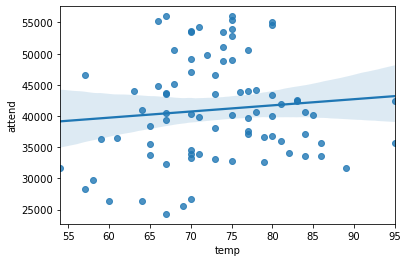

In [10]:
# Here we draft a scatterplot to see if any relationship between attendance and temperature
sns.regplot(df_Dodgers['temp'],df_Dodgers['attend'])
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(df_Dodgers['temp'],df_Dodgers['attend'])

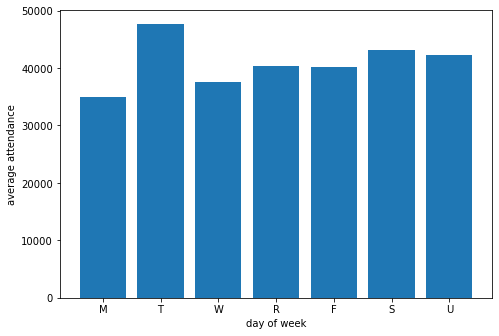

In [14]:
# Bar charts showing average attendance by day of the week
days = {'M':'Monday','T':'Tuesday','W':'Wednesday','R':'Thursday','F':'Friday','S':'Saturday','U':'Sunday'}
day_attendance = []
for day in days.keys():
    day_attendance.append(df_Dodgers[df_Dodgers['day_of_week']==days[day]].attend.mean())

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
x=days.keys()
ax.bar(x,day_attendance)
ax.set_xlabel('day of week')
ax.set_ylabel('average attendance')
plt.show()

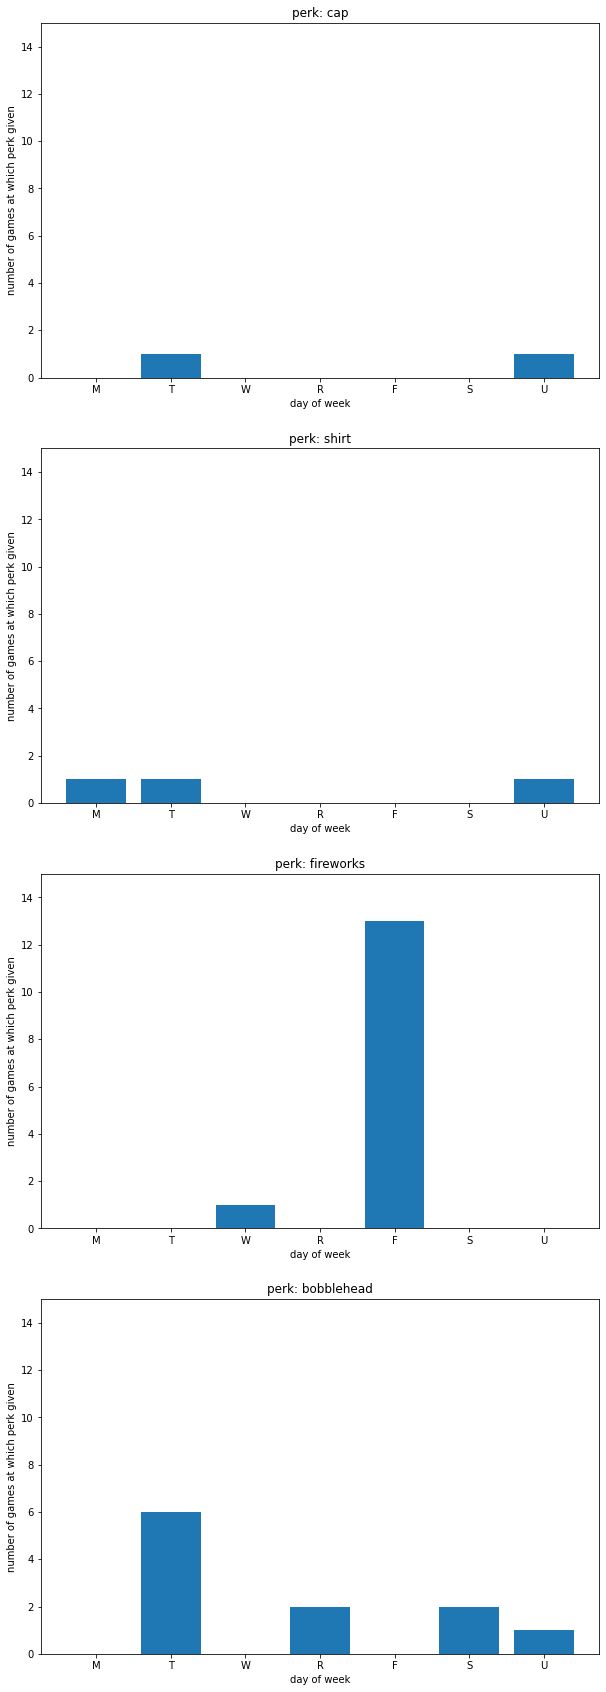

In [17]:
# This shows the distribution for each perk
fig, axs = plt.subplots(4,figsize=(10,30))
plot_coords = [(0,0),(0,1),(1,0),(1,1)]
perks = ['cap','shirt','fireworks','bobblehead']
count = 0
for perk in perks:
    ys=[]
    for day in days.keys():
        df_ = df_Dodgers[df_Dodgers['day_of_week']==days[day]]
        ys.append(len(df_[df_[perk]==bins[perk][1].upper()]))
    axs[count].set_title(f'perk: {perk}')
    axs[count].bar(days.keys(),ys)
    axs[count].set_xlabel('day of week')
    axs[count].set_ylabel('number of games at which perk given')
    axs[count].set_ylim(0,15)
    count+=1

In [18]:
# Checks to see if any null or duplicate values
df_Dodgers.month.unique()

array(['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'], dtype=object)

In [20]:
# More temperature and attendance relationship research
months = ['APR','MAY','JUN','JUL','AUG','SEP','OCT']
print('Month marginal tickets/deg probability')
print('----- -------------------- -----------')
for month in months:
    x = df_Dodgers[df_Dodgers['month'] == month]['temp']
    y = df_Dodgers[df_Dodgers['month'] == month]['attend']
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    print(f'{month:>4} {round(slope):16} {" "*10}{round(p_value,3)}')

Month marginal tickets/deg probability
----- -------------------- -----------
 APR             1170           0.022
 MAY              337           0.412
 JUN               55           0.902
 JUL              552           0.487
 AUG             -105           0.826
 SEP             -296           0.25
 OCT             -756           0.796


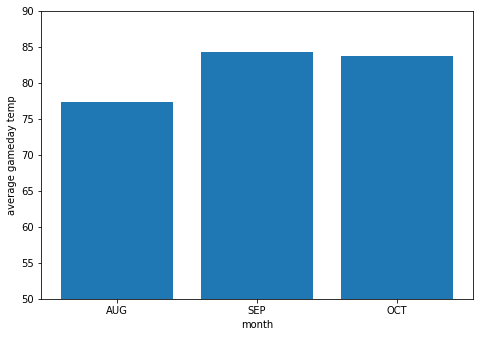

In [21]:
# This plots the average temperature on game nights by month for the hotter months
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = months[4:]
temps = [df_Dodgers[df_Dodgers['month']==month].temp.mean() for month in x]
ax.bar(x,temps)
ax.set_xlabel('month')
ax.set_ylabel('average gameday temp')
# 0 isn't particularly meaningful for degrees F, so I set ymin to LA's absolute 0.
plt.ylim(50,90)
plt.show()

In [22]:
"""
Attendance during the summer months actually declined instead of increased which leads me to believe that the heat is more of a
factor in determining attendance than the fact that school is out for summer break. Based on all of the data, I inferred that
giving bobbleheads held the most significance and did the most to increase attendance. Also, I did a boxplot to the attendance
based on the days of the week and found that Tuesdays had the greatest means and range of attendance. Just to make sure I wasn't
missing anything else, I ran a correlation analysis on the opposing team, on the day or night game data, and on the day of the
week. Tuesday proved to show the greatest correlation.
Based on this analysis, I would recommend giving out more bobbleheads. Reserve the giving of these objects for periods when
attendance is typically lower like cooler or hotter days. Also, I would recommend installing misters, air movers, and temporary
shade structures
"""

"\nIn trying to find the best day to do marketing campaign at Dodger's baseball games I based my analysis on picking the days with\nthe most attendance. There are several different ways to approach marketing campaigns but in this analysis I decided to go off\nof quantity of attendees rather than quality. For this I decided to find the best way to numerically assess what variables held\nthe best relationship for predicting high attendance numbers. For this I needed to install and load a few libraries like ggplot.\nI then found the proper folder to load the dataset to and checked the first six rows to see the types of variables involved.\nThe attendance was the variable I chose to use to determine the number of spectators at a game. At first I decided to test the\nrelationship between the temperature and the attendance. This proved fruitless. Just by looking at the scatterplot I saw no\nrelationship. Then by luck I did a boxplot to the attendance based on the days of the week and found t